In [1]:
import pandas as pd
import datetime as dt
from prophet import Prophet

data = pd.read_csv("../raw_data/JPM 2020-2021.csv",parse_dates = True)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-10,110.459999,110.510002,105.849998,106.059998,102.721634,24913300
1,2020-06-11,100.029999,101.580002,96.540001,97.209999,94.150200,36259200
2,2020-06-12,100.709999,101.129997,97.330002,99.870003,96.726471,24856800
3,2020-06-15,96.419998,101.430000,95.870003,101.250000,98.063034,22153600
4,2020-06-16,105.370003,105.680000,99.309998,102.059998,98.847534,22193600


In [2]:
data.shape

(252, 7)

In [3]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [4]:
data['Date'] = pd.to_datetime(data['Date'])

In [5]:
import numpy as np

#stocks_df= data[(data.symbol=="JPM")]
#stocks_df= stocks_df[(data.date.dt.year == 2017) | (data.date.dt.year == 2018)]
#stocks_df= stocks_df[(stocks_df.date.dt.year > 2015 ) & (stocks_df.date.dt.year < 2021)]
#stocks_df.sort_values(by=["date"], inplace=True)
#stocks_df

In [6]:
#import numpy as np

#stocks_df= data[(data.symbol=="JPM")]
#stocks_df = stocks_df[(data.date.dt.year == 2016) | (data.date.dt.year == 2020)]
#stocks_df.sort_values(by=["date"], inplace=True)
#stocks_df

# Selectionner 10 actions de secteurs differents sur une periode de deux ans.
# GS,WMT,AAPL,AMZN,JPM,BA,CCL,CVX,KO,MSFT


In [7]:
data = data[["Date", "Adj Close"]].copy()  #à verifier, si il faut garder le .copy() ou pas
data.rename(columns={"Date": "ds", "Adj Close": "y"}, inplace=True)
data

,ds,y
0,2020-06-10,102.721634
1,2020-06-11,94.150200
2,2020-06-12,96.726471
3,2020-06-15,98.063034
4,2020-06-16,98.847534
...,...,...
247,2021-06-03,166.169998
248,2021-06-04,166.440002
249,2021-06-07,165.660004
250,2021-06-08,165.000000


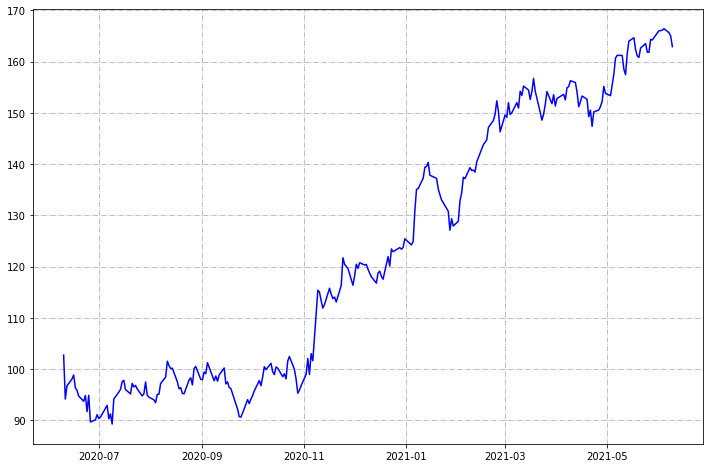

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.grid(linestyle='-.')

plt.plot(data['ds'], data['y'], 'b')
plt.show()

In [9]:
index=round(len(data)*80/100)
index

202

In [10]:
train = data.iloc[:index]
test = data.iloc[index:]

In [11]:
train.shape, test.shape

((202, 2), (50, 2))

In [12]:
train

,ds,y
0,2020-06-10,102.721634
1,2020-06-11,94.150200
2,2020-06-12,96.726471
3,2020-06-15,98.063034
4,2020-06-16,98.847534
...,...,...
197,2021-03-23,148.584885
198,2021-03-24,149.738083
199,2021-03-25,151.656799
200,2021-03-26,154.181915


In [13]:
model = Prophet(seasonality_mode='multiplicative', interval_width=0.95)
model.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [39]:
horizon = 12
future = model.make_future_dataframe(periods=horizon, freq='MS')
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
209,2021-11-01,232.140071,210.686021,256.780448
210,2021-12-01,243.747593,217.374090,273.110140
211,2022-01-01,240.363922,211.280667,272.655502
212,2022-02-01,264.806403,228.816781,304.064408
213,2022-03-01,274.561132,235.203144,321.397951


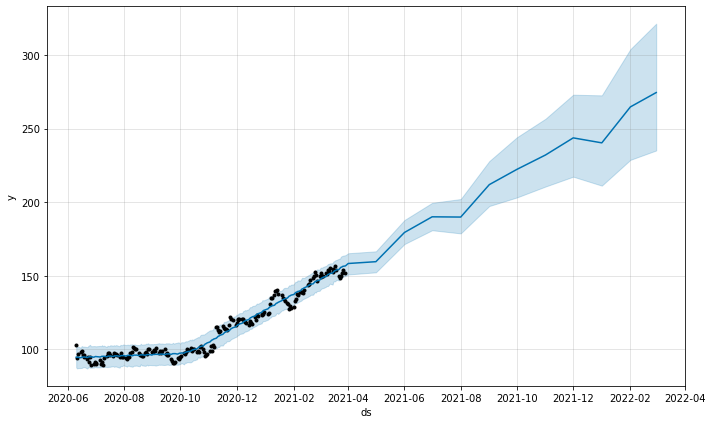

In [40]:
ax = model.plot(forecast);

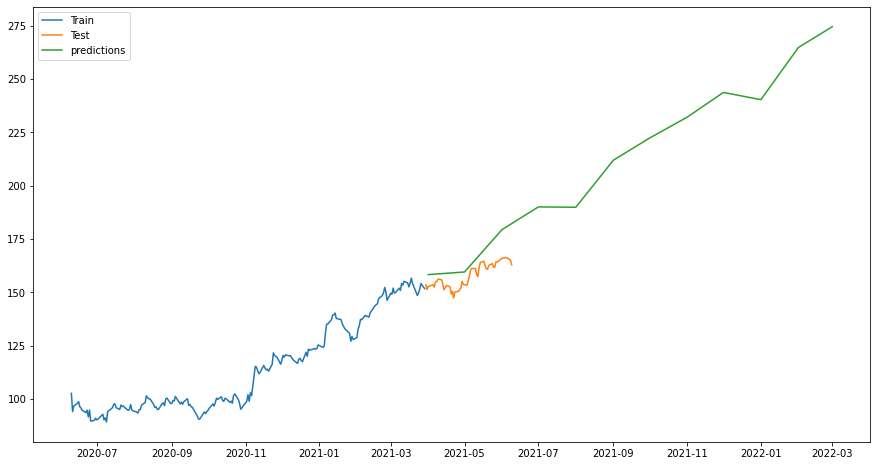

In [42]:
plt.figure(figsize=(15, 8))
plt.plot(train['ds'], train['y'], label="Train")
plt.plot(test['ds'], test['y'], label="Test")
plt.plot(forecast[-horizon:]['ds'], forecast[-horizon:]['yhat'], label="predictions")
plt.legend(loc="best")
plt.show()

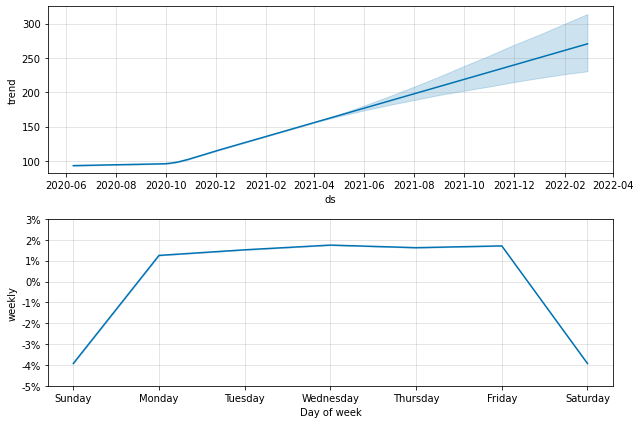

In [43]:
model.plot_components(forecast);

In [44]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
# Your code here
cv_results = cross_validation(model=model, initial=f'{20 * 5} days', horizon='35 days', period='180 days')

# Comment choisir le chiffre initial {XX*5} et horizon 'XX days' (ici initial=20 et horizon=75)

INFO:prophet:Making 1 forecasts with cutoffs between 2021-02-22 00:00:00 and 2021-02-22 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

In [45]:
cv_results

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-02-23,144.694722,137.602720,151.584893,149.728149,2021-02-22
1,2021-02-24,144.964494,137.568623,152.268067,152.362625,2021-02-22
2,2021-02-25,145.201764,137.844650,153.450699,150.294800,2021-02-22
3,2021-02-26,145.854673,138.586280,152.362161,146.308289,2021-02-22
4,2021-03-01,146.399507,139.205311,153.144950,149.618790,2021-02-22
5,2021-03-02,147.059640,140.283994,154.587989,149.131653,2021-02-22
6,2021-03-03,147.328301,140.288082,154.091958,152.014679,2021-02-22
7,2021-03-04,147.563938,140.511768,154.279816,149.678436,2021-02-22
8,2021-03-05,148.221966,141.106388,155.791663,150.026398,2021-02-22
9,2021-03-08,148.759230,141.849652,156.199438,152.014679,2021-02-22


In [46]:
data_p = performance_metrics(cv_results)
data_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,2 days,40.033862,6.327232,6.215779,0.041087,0.041087,0.041978,0.5
1,3 days,40.335678,6.351038,6.245583,0.041222,0.041222,0.042118,0.5
2,4 days,13.072391,3.615576,2.773326,0.018494,0.018494,0.018788,1.0
3,7 days,5.284775,2.298864,1.836450,0.012308,0.012308,0.012428,1.0
4,8 days,7.328511,2.707122,2.645648,0.017705,0.017705,0.017871,1.0
5,9 days,13.127687,3.623215,3.379195,0.022361,0.022361,0.022651,1.0
6,10 days,13.216619,3.635467,3.400438,0.022478,0.022478,0.022769,1.0
7,11 days,3.863538,1.965589,1.959465,0.013077,0.013077,0.013164,1.0
8,14 days,6.926962,2.631912,2.529941,0.016721,0.016721,0.016874,1.0
9,15 days,6.448790,2.539447,2.385951,0.015731,0.015731,0.015872,1.0


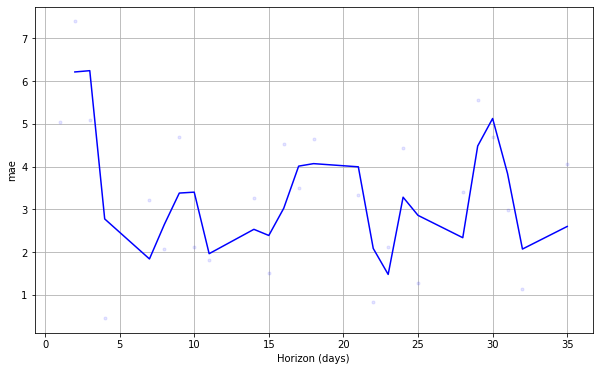

In [47]:
# Plot results below
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(cv_results, metric='mae');